In [3]:
# prepare list of the checkpoints that are used for the ensemble prediction

import os
from batchgenerators.utilities.file_and_folder_operations import *
import shutil
from nnunet.inference.predict import predict_cases, check_input_folder_and_return_caseIDs
from tqdm import tqdm

base = "/home/annalena/Seminar_Medical_Image_Analysis/code/"
input_folder = "/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/imagesTr/"
checkpoint_prediction_folder = "nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"

model = base + "nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/"
folds = (0, ) # or None
save_npz = True

# default values - see documentation
num_parts = 1
part_id = 0 

# checkpoint list
max_cycles = 3
max_num_epochs = 1200
max_num_epochs_per_cycle = int(max_num_epochs / max_cycles)
save_last_x_checkpoints_per_cycle = 10

checkpoints_multi_modal = ["model_ep_%03.0d" % (epoch + 1) for epoch in range(max_num_epochs) if max_num_epochs_per_cycle - (epoch % max_num_epochs_per_cycle) <= save_last_x_checkpoints_per_cycle]
checkpoints_single_modal = ["model_ep_%03.0d" % (epoch + 1) for epoch in range(max_num_epochs - save_last_x_checkpoints_per_cycle * max_cycles, max_num_epochs)]
checkpoints_all = list(set(checkpoints_multi_modal + checkpoints_single_modal))

print(len(checkpoints_multi_modal))
print(checkpoints_multi_modal)
print(len(checkpoints_single_modal))
print(checkpoints_single_modal)
print(len(checkpoints_all))
print((checkpoints_all))



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

30
['model_ep_391', 'model_ep_392', 'model_ep_393', 'model_ep_394', 'model_ep_395', 'model_ep_396', 'model_ep_397', 'model_ep_398', 'model_ep_399', 'model_ep_400', 'model_ep_791', 'model_ep_792', 'model_ep_793', 'model_ep_794', 'model_ep_795', 'model_ep_796', 'model_ep_797', 'model_ep_798', 'model_ep_799', 'model_ep_800', 'model_ep_1191', 'model_ep_1192', 'model_ep_1193', 'model_ep_1194', 'model_ep_1195', 'model_ep_1196', 'model_ep_1197', 'model_ep_1198', 'model_ep_1199', 'model_ep_1200']
30
['model_ep_1171', 'model_ep_1172', 'model_ep_1173', 'model_ep_1174', 'model_ep_1175', 'model_ep_1176', 'model_ep_1177', 'model_ep_1178', 'mod

In [4]:
# get case_id list for one checkpoint

# loop über die Testdaten
current_checkpoint = checkpoints_all[0]
output_folder = join(base, checkpoint_prediction_folder, current_checkpoint)
shutil.copy(join(model, 'plans.pkl'), output_folder)

assert isfile(join(model, "plans.pkl")), "Folder with saved model weights must contain a plans.pkl file"
expected_num_modalities = load_pickle(join(model, "plans.pkl"))['num_modalities']

# check input folder integrity
case_ids = check_input_folder_and_return_caseIDs(input_folder, expected_num_modalities)

print(case_ids)

This model expects 1 input modalities for each image
Found 300 unique case ids, here are some examples: ['H1I3W0_0009_A_1' 'A7G0P5_0009_B_2' 'N7V9W9_0007_B_3' 'J6K6P5_0000_A_1'
 'I0J5U3_0028_B_2' 'B6D0U7_0029_B_2' 'B8J7R4_0000_A_1' 'K5P0Y1_0009_A_1'
 'A3H1O5_0000_A_1' 'C1K8P5_0008_A_1']
If they don't look right, make sure to double check your filenames. They must end with _0000.nii.gz etc
['A0S9V9_0000_A_1' 'A0S9V9_0009_A_1' 'A1D0Q7_0000_B_2' 'A1D0Q7_0009_B_2'
 'A1D9Z7_0011_A_1' 'A1D9Z7_0022_A_1' 'A1E9Q1_0000_A_1' 'A1E9Q1_0009_A_1'
 'A1O8Z3_0010_B_3' 'A1O8Z3_0023_B_3' 'A2C0I1_0000_A_1' 'A2C0I1_0007_A_1'
 'A2N8V0_0000_A_1' 'A2N8V0_0009_A_1' 'A3B7E5_0012_B_2' 'A3B7E5_0029_B_2'
 'A3H1O5_0000_A_1' 'A3H1O5_0012_A_1' 'A4B5U4_0000_A_1' 'A4B5U4_0010_A_1'
 'A4J4S4_0000_A_1' 'A4J4S4_0007_A_1' 'A4U9V5_0000_A_1' 'A4U9V5_0008_A_1'
 'A5E0T8_0008_B_3' 'A5E0T8_0024_B_3' 'A6B5G9_0000_A_1' 'A6B5G9_0011_A_1'
 'A6D5F9_0000_A_1' 'A6D5F9_0011_A_1' 'A6M1Q7_0011_B_2' 'A6M1Q7_0029_B_2'
 'A7D9L8_0000_A_1' 'A7D9

In [ ]:
### Task: predictive posterior berechnen: 
# I have for each epoch the predictions for all test data: Epoch_X -> all test images
# I need for each test image a sum over all predictions: Test_image_X -> all epochs

# Get predictions with labels

In [384]:
# get predictions for one epoch for all test images:
folder_with_predictions = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_392"
folder_with_gts = "/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/labelsTr/"
files_gt = subfiles(folder_with_gts, suffix=".nii.gz", join=False)
files_pred = subfiles(folder_with_predictions, suffix=".nii.gz", join=False)
# check that prediction files match gt files
assert all([i in files_pred for i in files_gt]), "files missing in folder_with_predictions"
assert all([i in files_gt for i in files_pred]), "files missing in folder_with_gts"

one_epoch_all_prediction_paths = [join(folder_with_predictions, i) for i in files_pred]
print(one_epoch_all_prediction_paths[0])

/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_392/A0S9V9_0000_A_1.nii.gz


In [6]:
import SimpleITK as sitk
import numpy as np

In [7]:
test = one_epoch_all_prediction_paths[0]
test_nifti = sitk.ReadImage(test)
test_pred = sitk.GetArrayFromImage(test_nifti)

In [8]:
np.unique(test_pred)

array([0, 1, 2, 3], dtype=uint8)

# Get softmax predictions

In [387]:
# get predictions for one epoch for all test images:
folder_with_predictions = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_392"
folder_with_gts = "/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/labelsTr/"
foder_with_test_inputs = "/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/imagesTr/"

#'reference': '/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/labelsTr/A0S9V9_0000_A_1.nii.gz',
 # 'test': '/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_392/A0S9V9_0000_A_1.nii.gz'},
    
# /home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_preprocessed/Task500_ACDC/gt_segmentations/patient006_frame01.nii.gz
files_gt = subfiles(folder_with_gts, suffix=".nii.gz", join=False)
files_gt_npz = subfiles(folder_with_gts, suffix=".npz", join=False)
files_pred = subfiles(folder_with_predictions, suffix=".npz", join=False)
files_pred_niigz = subfiles(folder_with_predictions, suffix=".nii.gz", join=False)

one_epoch_all_prediction_paths = [join(folder_with_predictions, i) for i in files_pred]
print(one_epoch_all_prediction_paths[0])

/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_392/A0S9V9_0000_A_1.npz


In [496]:
print(len(files_gt))

300


In [218]:
test = one_epoch_all_prediction_paths[0]
test_pred = np.load(test)['softmax']
print(np.load(test).files)

['softmax']


In [11]:
(test_pred).shape
# number labels x (size of volume)

(4, 13, 255, 215)

In [12]:
(test_pred[:, 0, 0, 0])
# certain prediction for background (class 0)

array([1.00e+00, 8.17e-06, 2.44e-06, 1.55e-06], dtype=float16)

In [642]:
(test_pred[:, 5, 100, 100])
# high prediction for class 3
print(files_pred[0])

A0S9V9_0000_A_1.npz


# Calculate average softmax prediction vector for one test image over all epochs

In [275]:
# later: loop over all images, now one fixed image

# get name of test object
test_name = files_pred[case_no] #.split('.')[0]
print(test_name)

folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"

# epoch_list is contained in checkpoints_multi_modal
all_epochs_one_prediction_paths = [join(folder_with_epochs, i, test_name) for i in checkpoints_multi_modal]
#gt_path = join(folder_with_gts, test_name) 
for i in range(5):
    print(all_epochs_one_prediction_paths[i])

A7O4T6_0000_A_1.npz
/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_391/A7O4T6_0000_A_1.npz
/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_392/A7O4T6_0000_A_1.npz
/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_393/A7O4T6_0000_A_1.npz
/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_394/A7O4T6_0000_A_1.npz
/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_

In [750]:
# calculate Monte Carlo approximation of predictive posterior (see paper)

def get_posterior_vector2(case_no):
    
    # epoch_list is contained in checkpoints_multi_modal
 
    case_name = files_pred[case_no]
    #folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"
    all_epochs_one_prediction_paths = [join(folder_with_epochs, i, case_name) for i in checkpoints_multi_modal]

    posterior_vector = 0
    
    for path_one_prediction in all_epochs_one_prediction_paths:
        #path_one_prediction = join(folder_with_epochs, i, case_name)
        softmax_pred = np.load(path_one_prediction)['softmax']
        posterior_vector += softmax_pred    
    posterior_vector /= len(all_epochs_one_prediction_paths)
    return posterior_vector

def get_posterior_vector(case_no, multi_modal = True):
    
    # epoch_list is contained in checkpoints_multi_modal
    case_name = files_pred[case_no]
    #folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"
    if multi_modal:
        all_epochs_one_prediction_paths = [join(folder_with_epochs, i, case_name) for i in checkpoints_multi_modal]
    else:
        all_epochs_one_prediction_paths = [join(folder_with_epochs, i, case_name) for i in checkpoints_single_modal]
    
    posterior_vector = 0
    softmax_pred = np.array([np.load(p)['softmax'] for p in all_epochs_one_prediction_paths])
    posterior_vector = np.mean(softmax_pred, axis = 0)
    return posterior_vector

In [581]:
%timeit pv = get_posterior_vector(60)


1.52 s ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [575]:
print( pv.shape)


(4, 10, 296, 293)


In [506]:
import time

In [509]:
case_name = files_pred[60]
folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"
all_epochs_one_prediction_paths = [join(folder_with_epochs, i, case_name) for i in checkpoints_multi_modal]

%timeit get_posterior_vector(60, all_epochs_one_prediction_paths)


2.36 s ± 8.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [507]:
start = time.time()
case_no = 60
case_name = files_pred[case_no]
folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"
time1 = time.time()
print(time1-start)
# epoch_list is contained in checkpoints_multi_modal
all_epochs_one_prediction_paths = [join(folder_with_epochs, i, case_name) for i in checkpoints_multi_modal]
time2 = time.time()
print(time2-time1)
posterior_vector = 0

for path_one_prediction in all_epochs_one_prediction_paths:
    #path_one_prediction = join(folder_with_epochs, i, case_name)
    softmax_pred = np.load(path_one_prediction)['softmax']
    posterior_vector += softmax_pred

time3 = time.time()
print(time3-time2)
posterior_vector /= len(all_epochs_one_prediction_paths)

0.00026869773864746094
0.0008630752563476562
2.278979778289795


# Calculate Entropy

In [280]:
from scipy.stats import entropy
posterior_entropy = entropy(posterior_vector, base = 2, axis = 0)
posterior_entropy.shape

(12, 239, 195)

# Visualization

In [72]:
def change_label_definition(gt, three_and_one = True):
    # The labelling conventions in the training and test set are different,
    # so the ground truth is adapted to the convention of the training set.
    # Function can/must be extended for other permutations.
    
    # change label 3 and label 1
    if three_and_one:
        gt[gt == 1] = 5
        gt[gt == 3] = 1
        gt[gt == 5] = 3
    #return gt
        
    

In [129]:
print(files_pred_niigz[0].split('.')[0])
files_gt == files_pred_niigz

A0S9V9_0000_A_1


True

In [826]:
foder_with_test_inputs

'/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/imagesTr/'

In [304]:
files_pred_niigz[case_no]

'A7O4T6_0000_A_1.nii.gz'

In [756]:
# TODO: include cutting information and option for slicing to bounding box

case_no = 38
# case_name = files_pred_niigz[case_no]
def get_gt(case_no, cut_nonzero = True, change_label_def = True):
    case_name = files_pred_niigz[case_no]
    gt_path = join(folder_with_gts, case_name) 
    #print(gt_path)
    test_nifti = sitk.ReadImage(gt_path)
    test_gt = sitk.GetArrayFromImage(test_nifti)
    
    if cut_nonzero:
        input_path = join(foder_with_test_inputs, files_pred_niigz[case_no].split('.')[0]+ '_0000.nii.gz' )
        data, _, _ = load_case_from_list_of_files([input_path])
        _, _, bbox = crop_to_nonzero(data)
        bbox_slices = from_bbox_to_slice(bbox)
        test_gt = test_gt[bbox_slices]
    if change_label_def:
        change_label_definition(test_gt)
        
    return test_gt

def get_best_model(case_no, cut_nonzero = True):
    folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"

    # epoch_list is contained in checkpoints_multi_modal
    model_best_path = join(folder_with_epochs, "model_best", files_pred_niigz[case_no])
    #print(model_best_path)
    test_nifti_best_model = sitk.ReadImage(model_best_path)
    test_best_model = sitk.GetArrayFromImage(test_nifti_best_model)
    if cut_nonzero:
        input_path = join(foder_with_test_inputs, files_pred_niigz[case_no].split('.')[0]+ '_0000.nii.gz' )
        data, _, _ = load_case_from_list_of_files([input_path])
        _, _, bbox = crop_to_nonzero(data)
        bbox_slices = from_bbox_to_slice(bbox)
        test_best_model = test_best_model[bbox_slices]
    return test_best_model

def get_best_model_softmax(case_no):
 
    case_name = files_pred[case_no]
    #folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"
    model_best_path = join(folder_with_epochs, "model_best", case_name)
    softmax_pred = np.load(model_best_path)['softmax']
    
    return softmax_pred

def get_input_image(case_no, cut_nonzero = True):

    test_input_path = join(foder_with_test_inputs, files_pred_niigz[case_no].split('.')[0]+ '_0000.nii.gz' )
    #print(test_input_path)
    input_nifti = sitk.ReadImage(test_input_path)
    input_image = sitk.GetArrayFromImage(input_nifti)
    #print(input_image.shape)
    if cut_nonzero:
        input_path = join(foder_with_test_inputs, files_pred_niigz[case_no].split('.')[0]+ '_0000.nii.gz' )
        data, _, _ = load_case_from_list_of_files([input_path])
        _, _, bbox = crop_to_nonzero(data)
        bbox_slices = from_bbox_to_slice(bbox)
        input_image = input_image[bbox_slices]
    return input_image

def get_ensemble_segmentation(case_no):
    posterior_vector = get_posterior_vector(case_no)
    return np.argmax(posterior_vector, axis = 0)

def get_posterior_entropy(case_no):
    posterior_vector = get_posterior_vector(case_no)
    posterior_entropy = entropy(posterior_vector, base = 2, axis = 0)
    return posterior_entropy

def print_case_name(case_no):
    print(files_pred_niigz[case_no])

In [277]:
ensemble_segmentation = np.argmax(posterior_vector, axis = 0)
ensemble_segmentation.shape

(12, 239, 195)

In [157]:
ensemble_segmentation[7,150,50 ]

1

In [189]:
type(ensemble_segmentation)
(input_image[:, 1:, 1:]/255.).max()

10.168628

In [202]:
input_image.shape

(13, 255, 215)

In [395]:
import matplotlib.pyplot as plt
%matplotlib inline
from nnunet.preprocessing.cropping import crop_to_nonzero, load_case_from_list_of_files, crop_to_bbox

In [278]:
# accodance between label definitions
# change_label_definition(test_gt)

In [28]:
def overlay(image, mask, alpha = 0.5):
    #Combines image and its segmentation mask into a single image.

    overlayed_image = image/(image.max()) * (1.0 - alpha) + mask * alpha
    #overlayed_image = image/(image.max()) + mask * alpha
    
    return overlayed_image

 #overlay(input_image[:, 1:, 1:], ensemble_segmentation, alpha=0.4, resize = None)
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.patches as patches


In [386]:
print("nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_391/A0S9V9_0009_A_1.pkl")

nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_391/A0S9V9_0009_A_1.pkl


In [498]:
%timeit get_posterior_vector(case_no)

1.57 s ± 374 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [389]:
# reduces all shapes to bounding box size (defined below!!! TODO)
case_no = 60

test_gt = get_gt(case_no)
input_image = get_input_image(case_no)
ensemble_segmentation = get_ensemble_segmentation(case_no)
test_best_model = get_best_model(case_no)
posterior_vector = get_posterior_vector(case_no)
posterior_entropy = get_posterior_entropy(case_no)

In [390]:
print(test_gt.shape)
print(input_image.shape)
print(ensemble_segmentation.shape)
print(test_best_model.shape)
print(posterior_vector.shape)
print(posterior_entropy.shape)


(10, 319, 319)
(10, 319, 319)
(10, 296, 293)
(10, 319, 319)
(4, 10, 296, 293)
(10, 296, 293)


In [391]:
print_case_name(case_no=60)

B2D9O2_0013_B_2.nii.gz


In [417]:
case_name = files_pred_niigz[case_no]
input_path = join(foder_with_test_inputs, files_pred_niigz[case_no].split('.')[0]+ '_0000.nii.gz' )


data_file2 = [input_path]
data, seg, properties = load_case_from_list_of_files(data_file2)
data, seg, bbox = crop_to_nonzero(data)
bbox_slices = from_bbox_to_slice(bbox)

print(bbox)
print(data_file)
print(data_file2)
print(test_gt.shape)
print(ensemble_segmentation.shape)
print(test_gt[bbox_slices].shape)


[[0, 10], [12, 308], [0, 293]]
['/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/imagesTr/B2D9O2_0013_B_2_0000.nii.gz']
['/home/annalena/Seminar_Medical_Image_Analysis/code/data/nnUNet_raw_data_base/nnUNet_raw_data/Task679_mnm/imagesTr/B2D9O2_0013_B_2_0000.nii.gz']
(10, 319, 319)
(10, 296, 293)
(10, 296, 293)


(10, 296, 293)

In [411]:
def from_bbox_to_slice(b):
    xmin, xmax = b[0]
    ymin, ymax = b[1]
    zmin, zmax = b[2]
    
    
    slices = np.s_[max(xmin,0): xmax, max(ymin, 0): ymax, max(zmin, 0): zmax]
   
    return slices


Plot of slice no:  1


ValueError: operands could not be broadcast together with shapes (296,293) (319,319) 

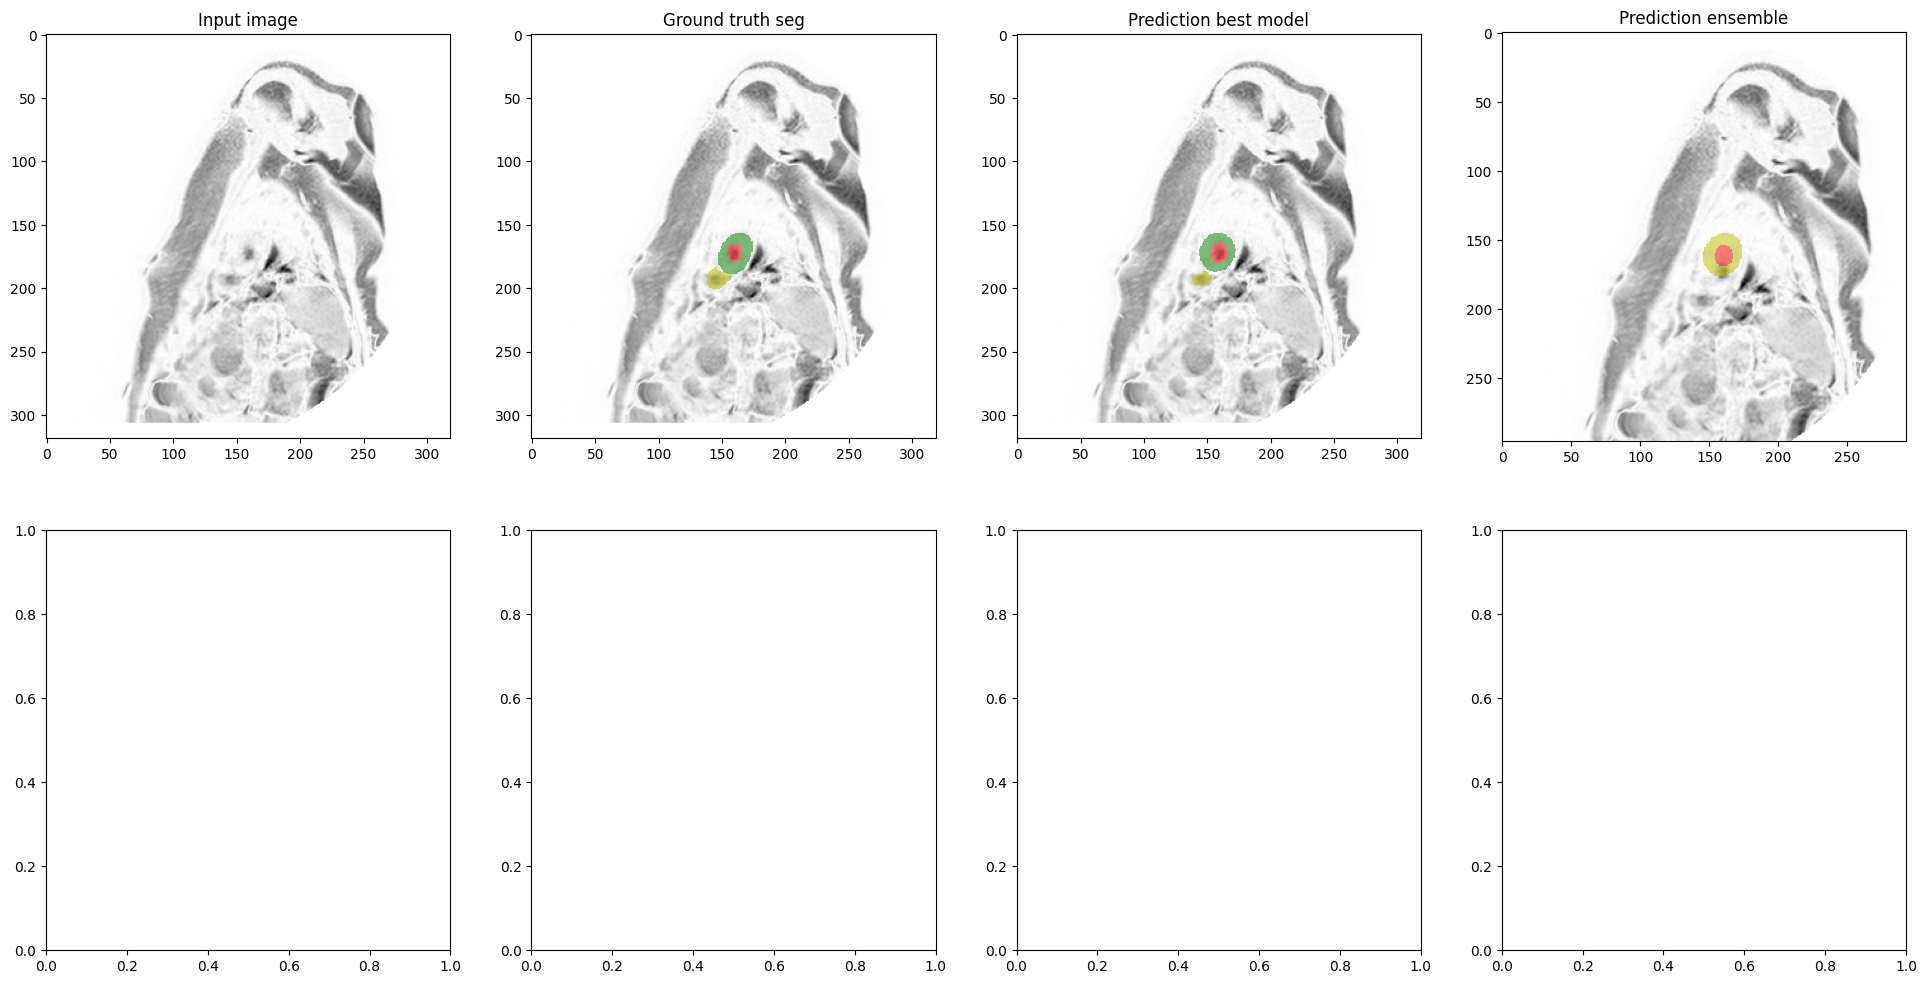

In [429]:
for i in range(1, 2):

    print("Plot of slice no: ", i)
    alpha = 0.3
    fig, ax = plt.subplots(2,4, figsize = (24, 12))
    my_cmap = ListedColormap(['y','g','r'])
    my_cmap2 = ListedColormap(['w', 'y','g','r'])
    #my_cmap.set_under('w', alpha=0)

    ax[0,0].imshow(input_image[i, :, :], cmap='Greys') 
    ax[0,0].set_title('Input image')

    ax[0,1].imshow(input_image[i, :, :], cmap='Greys')
    masked = np.ma.masked_where(test_gt[i, :, :] == 0, test_gt[i, :, :])
    ax[0,1].imshow(masked, vmin=0, vmax=3, alpha = 0.5, cmap = my_cmap2) 
    ax[0,1].set_title('Ground truth seg')
    #rect = patches.Rectangle((35, 87), 89, 86, linewidth=1, edgecolor='r', facecolor='none')
    #ax[0,1].add_patch(rect)

    ax[0,2].imshow(input_image[i, :, :], cmap='Greys')
    masked = np.ma.masked_where(test_best_model[i, :, :] == 0, test_best_model[i, :, :])
    ax[0,2].imshow(masked, alpha = 0.5, cmap = my_cmap)
    ax[0,2].set_title('Prediction best model')

    ax[0,3].imshow(input_image[i, :, :], cmap='Greys')
    #ax[0,3].imshow(test_gt[i, :, :], cmap = my_cmap, alpha = 0.7)#vmin=0, vmax=3
    masked = np.ma.masked_where(ensemble_segmentation[i, :, :] == 0, ensemble_segmentation[i, :, :])
    ax[0,3].imshow(masked, interpolation = None, alpha = 0.5, cmap = my_cmap)#vmin=0, vmax=3


    ax[0,3].set_title('Prediction ensemble')

    ax[1,0].imshow(np.abs(ensemble_segmentation[i, :, :]- test_gt[i, :, :]), vmin=0, vmax=3, cmap = my_cmap2)
    ax[1,0].set_title('Difference Ground Truth & Ensemble')
    ax[1,1].imshow(np.abs(test_gt[i, :, :]- test_best_model[i, :, :]), vmin=0, vmax=3, cmap = my_cmap2)
    ax[1,1].set_title('Difference Ground Truth & Best model')
    ax[1,2].imshow(np.abs(ensemble_segmentation[i, :, :]- test_best_model[i, :, :]), vmin=0, vmax=3, cmap = my_cmap2)
    ax[1,2].set_title('Difference Ensemble & Best model')
    entropy_plot = ax[1,3].imshow(posterior_entropy[i, :, :], vmin=0, vmax=1, cmap='Reds')#posterior_entropy
    fig.colorbar(entropy_plot)
    ax[1,3].set_title('Entropy of posterior')
    plt.show()

In [ ]:
# bessere Auswahl der Checkpoints -> aber nur auf Trainingsdaten
# erstmal Verteilung der einzelen Verhersagen analysieren, 
# woher kommt der Fehler (aus einzelnen Modes oder von früheren Checkpoints)

# Expected Calibration Error

In [267]:
posterior_entropy.shape
np.unique(posterior_entropy)

array([4.7613275e-06, 5.6188119e-06, 5.6702529e-06, ..., 1.2630922e+00,
       1.2656797e+00, 1.2661569e+00], dtype=float32)

In [277]:
print(posterior_entropy[0,0,0])
# normalize and rename to confidence

0.0005028117


In [272]:
np.max(posterior_entropy)

1.8266783

In [273]:
# entropy can be scaled in between 0 and 1, divide by: (if 4 classes are used)
np.log2(4)

2.0

In [43]:
print(test_gt.shape)
print(np.where(np.any(test_gt, axis=(1,2))))
print(np.where(np.any(test_gt, axis=(0,2))))

(13, 255, 215)
(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),)
(array([ 87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
       100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173]),)


In [257]:
min(2,0)

0

In [311]:
# bounding box of foreground classes
def bounding_box(img):
    """
    Calculated 3D bounding box of foreground pixel.
    
    Input: 3D numpy array where: 0 = background voxel
    Returns: slice object, that can be used like image[slice].
    Use for: Restrict performance evaluation on most relevant voxel.
    """
    # returns slices of the bounding box, enlarged by 2 units in each direction
    x = np.any(img, axis=(1,2))
    y = np.any(img, axis=(0,2))
    z = np.any(img, axis=(0,1))
    xmin, xmax = np.where(x)[0][[0, -1]]
    ymin, ymax = np.where(y)[0][[0, -1]]
    zmin, zmax = np.where(z)[0][[0, -1]]
    
    #mask = np.zeros(img.shape)
    #mask[xmin: xmax, ymin: ymax, zmin: zmax] = 1
    #slices = [slice(*i) for i in zip([xmin, ymin, zmin], [xmax, ymax, zmax])]
    #print(slices)
    # wie groß ist ein voxel in mm?
    slices = np.s_[max(xmin, 2)-2: xmax+2, max(ymin, 5)-5: ymax+5, max(zmin, 5)-5: zmax+5]
    #print(img[np.ogrid[xmin:xmax, ymin:ymax, zmin:zmax]].shape)
    return slices#xmin, xmax, ymin, ymax, zmin, zmax

slices = bounding_box(test_gt)
print(test_gt.shape)
test_gt[slices].shape


(12, 239, 195)


(12, 95, 100)

In [314]:
ensemble_segmentation = ensemble_segmentation[slices]

In [312]:
# norm the entropy by log_base(number classes)
print(posterior_entropy.min(), posterior_entropy.max() )
posterior_entropy_normed = posterior_entropy / np.log2(4)
print(posterior_entropy_normed.min(), posterior_entropy_normed.max() )

####!!!!! not entropy but (softmax) probability after using checkpoint ensemble
#### but use this later in the entropy plot

ensemble_confidence = np.max(posterior_vector, axis = 0)[slices]
test_gt = test_gt[slices]
ensemble_segmentation[slices]
# create "bins"

# calculate mean accuracy in one "bin"
# inidcator if label is correct per voxel


1.3097247e-05 1.7925112
6.5486233e-06 0.8962556


/tmp/ipykernel_3352071/73125668.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  true_label = test_gt == ensemble_segmentation


In [315]:
true_label = test_gt == ensemble_segmentation
print(true_label.size, true_label.sum(), true_label.sum()/true_label.size)

print(test_gt.size)
print(ensemble_confidence.min(), ensemble_confidence.max())
np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), 1, 0).sum()

114000 95260 0.8356140350877193
114000
0.3435 1.0


84029

In [597]:
#bins voll machen
#1% der kleinsten confidenzen in den 1% bin.
#bounding box nehmen!
print(posterior_vector.shape)

(4, 13, 255, 207)


In [624]:
for i in range(10):
    print(np.quantile(ensemble_confidence, q = 0.01*(i+1)))
print(np.quantile(ensemble_confidence, q = 0.9))
print(np.quantile(ensemble_confidence, q = 0.99))
print(np.unique(ensemble_confidence))

0.95458984375
0.998046875
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[0.3381 0.3557 0.358  ... 0.999  0.9995 1.    ]


# Expected calibration error of the mulit-class ensemble

In [647]:
print(probability_vector.shape)
print(posterior_vector.shape)

(13, 255, 215)
(4, 10, 292, 320)


In [712]:
N_total = 0
B_total = [0]*100
sum_conf_B_total = [0]*100
sum_acc_B_total = [0]*100
for case_no in range(3):
    # get ensemble confidence
    posterior_vector = get_posterior_vector(case_no)
    #ensemble_confidence = np.max(posterior_vector, axis = 0)
    ensemble_confidence = 1. - (entropy(posterior_vector, base = 2, axis = 0)/normalizer)

    # get accuracy -> from gt segmentation and predicted segmentation
    ensemble_segmentation = np.argmax(posterior_vector, axis = 0)
    gt_segmentation = get_gt(case_no, cut_nonzero=True)
    
    # compute bounding box of foreground classes and apply to confidence and segmentation tensors
    foreground_bb_slices = bounding_box(gt_segmentation)
    ensemble_confidence = ensemble_confidence[foreground_bb_slices]
    ensemble_segmentation = ensemble_segmentation[foreground_bb_slices]
    gt_segmentation = gt_segmentation[foreground_bb_slices]

    true_predicted_voxels = (gt_segmentation == ensemble_segmentation)

    # which voxel are in which bin
    #s1 = np.linspace(0, 99, 100)/100.
    #s = np.linspace(1, 100, 100)/100.
    ## use quantiles to define the bins:
    s1 = [np.quantile(ensemble_confidence, q = 0.01 *i) for i in range(101)]
    s1 = np.array(s1)
    #s = [np.quantile(ensemble_confidence, q = 0.01 * (i+1)) for i in range(100)]
    
    conf_bins = (ensemble_confidence[None] > s1[:-1, None, None, None]) & (ensemble_confidence[None] <= s1[1:, None, None, None])

    # total number of voxels in this image
    N = ensemble_confidence.size
    # number of voxels per bin in this image
    # B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), 1, 0).sum() for s in range(1, 101)]
    B = np.sum( conf_bins, axis = (1, 2, 3))
    N_total += N
    B_total += B

    # list with sum of confidence values per bin
    #sum_conf_B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), ensemble_confidence, 0).sum() for s in range(1, 101)]

    sum_conf_B = np.sum( ensemble_confidence[None].astype(np.float32)* conf_bins, axis = (1,2,3)) 
    #print(B, sum_conf_B)
    sum_conf_B_total += sum_conf_B
    # list with sum of accurate predicted labels per bin
    #sum_acc_B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), true_predicted_voxels, 0).sum() for s in range(1, 101)]
    sum_acc_B = np.sum( true_predicted_voxels[None].astype(np.float32)* conf_bins, axis = (1,2,3)) 
    sum_acc_B_total += sum_acc_B

In [713]:
#print(sum_conf_B_total / N_total)
#print(np.abs(sum_conf_B_total - sum_acc_B_total) / N_total)
#print(N_total)
print(np.sum( np.abs(sum_conf_B_total - sum_acc_B_total) ))
ece = np.sum( np.abs(sum_conf_B_total - sum_acc_B_total) ) / N_total
print(ece*100)   
        

4856.513977050781
1.6163488151748913


# ECE of single-modal ensemble

In [715]:
N_total = 0
B_total = [0]*100
sum_conf_B_total = [0]*100
sum_acc_B_total = [0]*100
for case_no in range(3):
    # get ensemble confidence
    posterior_vector = get_posterior_vector(case_no, multi_modal=False)
    #ensemble_confidence = np.max(posterior_vector, axis = 0)
    ensemble_confidence = 1. - (entropy(posterior_vector, base = 2, axis = 0)/normalizer)

    # get accuracy -> from gt segmentation and predicted segmentation
    ensemble_segmentation = np.argmax(posterior_vector, axis = 0)
    gt_segmentation = get_gt(case_no, cut_nonzero=True)
    
    # compute bounding box of foreground classes and apply to confidence and segmentation tensors
    foreground_bb_slices = bounding_box(gt_segmentation)
    ensemble_confidence = ensemble_confidence[foreground_bb_slices]
    ensemble_segmentation = ensemble_segmentation[foreground_bb_slices]
    gt_segmentation = gt_segmentation[foreground_bb_slices]

    true_predicted_voxels = (gt_segmentation == ensemble_segmentation)

    # which voxel are in which bin
    #s1 = np.linspace(0, 99, 100)/100.
    #s = np.linspace(1, 100, 100)/100.
    ## use quantiles to define the bins:
    s1 = [np.quantile(ensemble_confidence, q = 0.01 *i) for i in range(101)]
    s1 = np.array(s1)
    #s = [np.quantile(ensemble_confidence, q = 0.01 * (i+1)) for i in range(100)]
    
    conf_bins = (ensemble_confidence[None] > s1[:-1, None, None, None]) & (ensemble_confidence[None] <= s1[1:, None, None, None])

    # total number of voxels in this image
    N = ensemble_confidence.size
    # number of voxels per bin in this image
    # B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), 1, 0).sum() for s in range(1, 101)]
    B = np.sum( conf_bins, axis = (1, 2, 3))
    N_total += N
    B_total += B

    # list with sum of confidence values per bin
    #sum_conf_B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), ensemble_confidence, 0).sum() for s in range(1, 101)]

    sum_conf_B = np.sum( ensemble_confidence[None].astype(np.float32)* conf_bins, axis = (1,2,3)) 
    #print(B, sum_conf_B)
    sum_conf_B_total += sum_conf_B
    # list with sum of accurate predicted labels per bin
    #sum_acc_B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), true_predicted_voxels, 0).sum() for s in range(1, 101)]
    sum_acc_B = np.sum( true_predicted_voxels[None].astype(np.float32)* conf_bins, axis = (1,2,3)) 
    sum_acc_B_total += sum_acc_B

In [716]:
print(np.sum( np.abs(sum_conf_B_total - sum_acc_B_total) ))
ece = np.sum( np.abs(sum_conf_B_total - sum_acc_B_total) ) / N_total
print(ece*100)

5811.153167724609
1.934072584128645


# ECE of best model

In [717]:
#def get_expected_calibration_error():

# param s: bin size s-1 % to s %
# calculates ECE for whole dataset and ensemble prediction -> change this (maybe by giving the confidence vector, true_predicted_voxel vector)
N_total = 0
B_total = [0]*100
sum_conf_B_total = [0]*100
sum_acc_B_total = [0]*100
for case_no in range(3):
    # get ensemble confidence
    probability_vector = get_best_model_softmax(case_no, cut_nonzero=True)
    
    #ensemble_confidence = np.max(posterior_vector, axis = 0)
    confidence = 1. - (entropy(probability_vector, base = 2, axis = 0)/normalizer)

    # get accuracy -> from gt segmentation and predicted segmentation
    pred_segmentation = np.argmax(probability_vector, axis = 0)
    gt_segmentation = get_gt(case_no, cut_nonzero=True)
    
    # compute bounding box of foreground classes and apply to confidence and segmentation tensors
    foreground_bb_slices = bounding_box(gt_segmentation)
    confidence = confidence[foreground_bb_slices]
    pred_segmentation = pred_segmentation[foreground_bb_slices]
    gt_segmentation = gt_segmentation[foreground_bb_slices]

    true_predicted_voxels = (gt_segmentation == pred_segmentation)

    # which voxel are in which bin
    #s1 = np.linspace(0, 99, 100)/100.
    #s = np.linspace(1, 100, 100)/100.
    ## use quantiles to define the bins:
    s1 = [np.quantile(confidence, q = 0.01 *i) for i in range(101)]
    s1 = np.array(s1)
    #s = [np.quantile(ensemble_confidence, q = 0.01 * (i+1)) for i in range(100)]
    
    conf_bins = (confidence[None] > s1[:-1, None, None, None]) & (confidence[None] <= s1[1:, None, None, None])

    # total number of voxels in this image
    N = confidence.size
    # number of voxels per bin in this image
    # B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), 1, 0).sum() for s in range(1, 101)]
    B = np.sum( conf_bins, axis = (1, 2, 3))
    N_total += N
    B_total += B

    # list with sum of confidence values per bin
    #sum_conf_B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), ensemble_confidence, 0).sum() for s in range(1, 101)]

    sum_conf_B = np.sum(confidence[None].astype(np.float32)* conf_bins, axis = (1,2,3)) 
    #print(B, sum_conf_B)
    sum_conf_B_total += sum_conf_B
    # list with sum of accurate predicted labels per bin
    #sum_acc_B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), true_predicted_voxels, 0).sum() for s in range(1, 101)]
    sum_acc_B = np.sum( true_predicted_voxels[None].astype(np.float32)* conf_bins, axis = (1,2,3)) 
    sum_acc_B_total += sum_acc_B


In [718]:
print(np.sum( np.abs(sum_conf_B_total - sum_acc_B_total) ))
ece = np.sum( np.abs(sum_conf_B_total - sum_acc_B_total) ) / N_total
print(ece*100)   

25360.39385986328
8.440466301849579


In [827]:
all_epochs_one_prediction_paths[0]

'/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/model_ep_391/B2D9O2_0013_B_2.npz'

# Entropy comparison best model and multi-modal ensemble

In [ ]:
entropy_best_model = []
entropy_multi_ensemble = []
for case_no in range(300):
    # get ensemble confidence
    probability_vector = get_best_model_softmax(case_no, cut_nonzero=True)
    posterior_vector = get_posterior_vector(case_no)
    
    #ensemble_confidence = np.max(posterior_vector, axis = 0)
    entropy_best_model.append(entropy(probability_vector, base = 2, axis = 0)) 
    entropy_multi_ensemble.append(entropy(posterior_vector, base = 2, axis = 0)) 

In [689]:
entropy_best_model_mean = [e.mean() for e in entropy_best_model]
entropy_multi_ensemble_mean = [e.mean() for e in entropy_multi_ensemble]

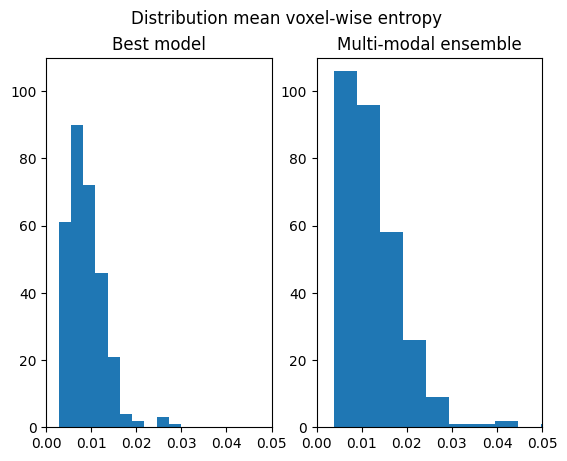

In [705]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(entropy_best_model_mean)
ax[0].set_xlim(xmin=0, xmax = 0.05)
ax[0].set_ylim(ymin=0, ymax = 110)
ax[1].hist(entropy_multi_ensemble_mean)
ax[1].set_xlim(xmin=0, xmax = 0.05)
ax[1].set_ylim(ymin=0, ymax = 110)
ax[0].set_title("Best model")
ax[1].set_title("Multi-modal ensemble")
fig.suptitle('Distribution mean voxel-wise entropy')
plt.show()

### Different bin distributions

In [603]:
# conf 1- entropy, bins correspond to probability bin
conf_bins.sum(axis = (1,2,3))

array([   651,    492,    428,    431,    484,    458,    379,    347,
          370,    298,    281,    274,    254,    238,    242,    227,
          250,    228,    218,    185,    189,    164,    168,    180,
          147,    167,    147,    152,    158,    151,    136,    133,
          126,    162,    150,    148,    165,    144,    151,    162,
          153,    153,    158,    150,    153,    166,    202,    166,
          186,    200,    197,    219,    223,    229,    221,    206,
          226,    240,    226,    245,    252,    303,    275,    328,
          281,    298,    277,    293,    318,    291,    298,    393,
          416,    511,    529,    473,    439,    526,    501,    448,
          451,    463,    543,    467,    424,    457,    522,    574,
          653,    593,    608,    730,   1374,   1138,    700,    805,
          952,   1452,   4242, 644920])

In [611]:
# conf 1- entropy, bins correspond to quantiles
conf_bins.sum(axis = (1,2,3))

array([ 9471,  9472,  9472,  9473,  9475,  9478,  9478,  9473,  9456,
        9494,  9460,  9512,  9498,  9397,  9532,  9421,  9536,  9539,
        9360,  9595,  9444,  9412,  9531,  9463,  9371,  9610,  9353,
        9463,  9557,  9436,  9524,  9508,  9533,  9686,  9261,  9494,
        9489,  9252,  9536,  9806,  9144,  9426,  9725,  9573,  9110,
        9521,  9637,  9442,  9285,  9834,  9058,  9793, 10701,  8268,
        9843,  9880,  8777,  9101,  9591, 10775,  8990,  9907,  8095,
       10345, 11710,  6460, 10489, 11267,  6897,  9440, 11253,  7795,
        9925, 11439,  6729,  9703, 10565,  9066,  8661,  9222, 10455,
        9850,  8915, 10330,  7949,  9715, 11514,  8831,  8511,  9813,
        9075,  8897,  9347, 11460,  7912,  9393, 10124,  8540,  9468,
        9337])

In [637]:
# conf 1- entropy, bins correspond to quantiles, with bounding box
conf_bins.sum(axis = (1,2,3))

array([832, 833, 833, 833, 833, 833, 833, 833, 833, 833, 833, 833, 833,
       833, 833, 833, 833, 833, 833, 833, 833, 833, 833, 833, 833, 833,
       833, 833, 834, 832, 834, 834, 832, 834, 834, 830, 835, 831, 838,
       830, 834, 830, 835, 834, 835, 838, 825, 839, 827, 840, 831, 829,
       832, 837, 839, 829, 832, 842, 817, 841, 837, 824, 833, 837, 835,
       836, 826, 840, 829, 828, 841, 834, 829, 831, 828, 842, 827, 854,
       812, 838, 828, 833, 832, 848, 835, 816, 837, 846, 832, 842, 811,
       844, 853, 802, 827, 857, 816, 826, 870, 796])

In [529]:
%timeit ece = get_expected_calibration_error()
print(ece)

1.28 s ± 862 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)
0.003413068810233172


In [ ]:
ece = get_expected_calibration_error()
print(ece)

692790.7133333334


In [456]:
s1 = np.linspace(0, 99, 100)/100.
s = np.linspace(1, 100, 100)/100.
print(ensemble_confidence[None].shape)
print(s[:, None, None, None].shape)
conf_bins = (ensemble_confidence[None] > s1[:, None, None, None]) & (ensemble_confidence[None] <= s[:, None, None, None])
# for every s, there is a 3-dim tensor which contains the truth values of the above comparison
print(conf_bins[99].shape)



(1, 10, 296, 293)
(100, 1, 1, 1)
(10, 296, 293)


In [480]:
#10*296*293
np.sum( conf_bins, axis = (1, 2, 3))

array([     0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      2,      7,      8,      7,      7,     16,
           14,     14,     11,     10,     15,     10,     17,     24,
           23,    125,    287,    260,    302,    262,    272,    210,
          222,    223,    233,    214,    291,    269,    248,    259,
          289,    338,    413,    363,    368,    312,    331,    339,
          295,    256,    262,    187,    171,    205,    170,    160,
          138,    152,    163,    191,    188,    221,    234,    302,
          529,    645,    788,    898,    806,    909,    890,   1077,
         2329,   2367,   3168, 842964])

In [485]:
# conf(B) for one image
sum_acc_B = np.sum( ensemble_confidence[None].astype(np.float32)* conf_bins, axis = (1,2,3)) 
np.sum(np.abs(2*sum_acc_B - sum_acc_B))       


863315.7

In [468]:
a =np.array([[0, 1], [7, 5], [7, 5]])
print(a.shape)
np.sum([[0, 1], [7, 5], [7, 5]], where=[[False, True], [False, True], [False, True]], axis = 0)

(3, 2)


array([ 0, 11])

In [316]:
s = 50.
test = ((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.) 

test = test[slices]
test.sum()

def mean_in_bin(s, ensemble_confidence, quantity):
    # ensemble_confidence and ensemble_accuracy are arrays which are already reduced to bounding box
    
    # total number of voxel
    #N = ensemble_confidence.size
    # number of voxel in bin ((s-1)%, s%]
    #B = np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), 1, 0).sum()
    # mark all confidence values in one bin, select
    return np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), quantity, 0).mean()

N = ensemble_confidence.size
B = [np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), 1, 0).sum() for s in range(1, 101)]
expected_calibration_error_list = [B[s-1]*np.abs( mean_in_bin(s,ensemble_confidence, ensemble_confidence ) - mean_in_bin(s, ensemble_confidence, true_label) ) for s in range(1, 101)]
expected_calibration_error = sum(expected_calibration_error_list) / (1.0*N)

print("number of voxels in bin: ", [B[s-1] for s in range(1, 101)])
print("mean confidence in bins: ", [mean_in_bin(s,ensemble_confidence, ensemble_confidence) for s in range(1, 101)])
s = 100
print("mean confidence in bin 99-100%: ", mean_in_bin(s,ensemble_confidence, ensemble_confidence ))
print("mean accuracy in bin 99-100%: ", mean_in_bin(s, ensemble_confidence, true_label))
print(np.abs( mean_in_bin(s,ensemble_confidence, ensemble_confidence ) - mean_in_bin(s, ensemble_confidence, true_label) ))
print("total number of voxel: ", N)
print("ECE: ", expected_calibration_error)


number of voxels in bin:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 2, 5, 14, 10, 8, 14, 16, 17, 30, 27, 35, 41, 34, 41, 134, 140, 145, 203, 215, 200, 233, 267, 274, 284, 272, 245, 244, 279, 279, 257, 244, 253, 239, 263, 216, 273, 348, 487, 451, 472, 424, 386, 489, 381, 350, 415, 452, 495, 670, 828, 917, 804, 1041, 919, 898, 1021, 960, 823, 1021, 1679, 2397, 2651, 2733, 84029]
mean confidence in bins:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.1e-06, 9.36e-06, 6.4e-06, 1.65e-05, 4.74e-05, 3.48e-05, 2.84e-05, 5.09e-05, 5.966e-05, 6.497e-05, 0.00011706, 0.0001079, 0.0001425, 0.0001708, 0.0001446, 0.0001781, 0.0005937, 0.0006323, 0.0006685, 0.0009527, 0.001029, 0.0009747, 0.001156, 0.001348, 0.001407, 0.001482, 0.001445, 0.001323, 0.001337, 0.0015545, 0.001579, 0.001477, 0.001425, 0.001498, 0.0

In [424]:
# calculate ECE of all test images


(10, 296, 293)


(10, 319, 319)

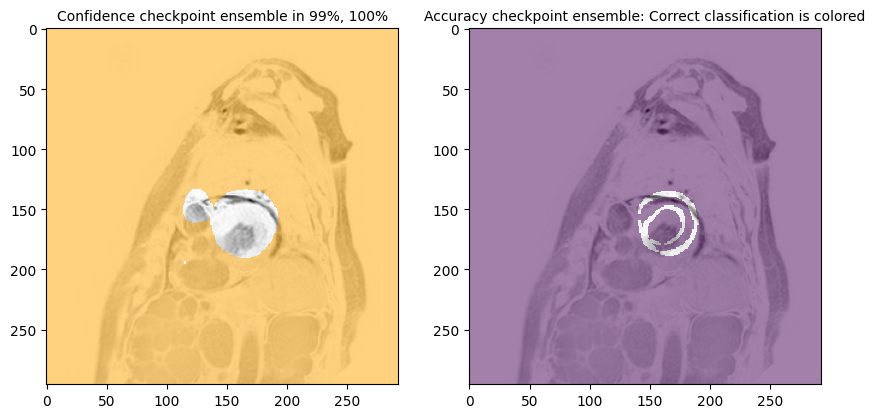

In [428]:
i = 5
true_label = test_gt[bbox_slices]== ensemble_segmentation
ensemble_confidence = np.max(posterior_vector, axis = 0)

alpha = 0.3
fig, ax = plt.subplots(1,2, figsize = (10, 5))
my_cmap = ListedColormap(['y','g','r'])
my_cmap2 = ListedColormap(['orange', 'y','g','r'])

plot_confidence = np.where( (((s-1)/100.<ensemble_confidence) & (ensemble_confidence <= (s)/100.)), ensemble_segmentation, -1)

ax[0].imshow(input_image[i, :, :], cmap='Greys')
masked = np.ma.masked_where(plot_confidence[i, :, :] == -1, plot_confidence[i, :, :])
ax[0].imshow(masked, alpha = 0.5, cmap = my_cmap2)
ax[0].set_title(f'Confidence checkpoint ensemble in {s-1}%, {s}%', fontsize=10)

ax[1].imshow(input_image[i, :, :], cmap='Greys')
masked = np.ma.masked_where(true_label[i, :, :] == 0, true_label[i, :, :])
ax[1].imshow(masked, alpha = 0.5)
ax[1].set_title(f'Accuracy checkpoint ensemble: Correct classification is colored', fontsize=10)

plt.show()

# Find image with low mean Dice score

In [ ]:
# alle Bilder auswerten
# Dice aus summary auslesen for best_model
# Dice mit formel direkt aus GT und prediction berechnen

In [ ]:
masked = np.ma.masked_where(test_gt[i, :, :] == 0, test_gt[i, :, :])

In [71]:
test = np.array([[0,1,2,3], [0,1,2,3]])
print(test)
test[:,2:] = 0
test

[[0 1 2 3]
 [0 1 2 3]]


array([[0, 1, 0, 0],
       [0, 1, 0, 0]])

# Calculate DICE score of mnm test data seperated by vendor

In [786]:
# create dict that seperates the cases to their vendors
vendor_case_dict = {}
case_vendor_dict = {}

for name in ["A_1", "B_2", "B_3"]:
    vendor_case_dict[name] = []
    for case in files_pred_niigz:       
        if case.find(name) != -1:
            vendor_case_dict[name].append(case)
            case_vendor_dict[case] = name
            #print(case)
#folder_with_gts

In [820]:
def dice(gt, pred):
    tp = int(((pred != 0) * (gt != 0)).sum())
    fp = int(((pred != 0) * (gt == 0)).sum())
    tn = int(((pred == 0) * (gt == 0)).sum())
    fn = int(((pred == 0) * (gt != 0)).sum()) 
    return float(2. * tp / (2 * tp + fp + fn))

In [821]:
dice_dict = {}
for name in ["A_1", "B_2", "B_3"]:
    case_names = vendor_case_dict[name]
    l = len(case_names)
    # for each vendor one array with dice score per label per case
    dice_dict[name]= np.empty((l,3))
    
    for i, case_name in enumerate(case_names):
        # get gt of current case
        gt_path = join(folder_with_gts, case_name) 
        
        test_nifti = sitk.ReadImage(gt_path)
        test_gt = sitk.GetArrayFromImage(test_nifti)
        #slices_i = bounding_box(test_gt)
        change_label_definition(test_gt)

        # get prediction of current case
        model_best_path = join(folder_with_epochs, "model_best", case_name)
        pred_nifti_best_model = sitk.ReadImage(model_best_path)
        pred_best_model = sitk.GetArrayFromImage(pred_nifti_best_model)
        if test_gt.shape != pred_best_model.shape:
            print(case_name)
            
        # get DICE per label
        for label in [1, 2, 3]:
            mask_pred = pred_best_model == label
            mask_gt = test_gt == label
            dice_dict[name][i, label-1] = dice(mask_gt, mask_pred)

In [825]:
for name in ["A_1", "B_2", "B_3"]:
    print(name, dice_dict[name].mean(axis = 0))
["Spain Siemens", "Germany General Electric", "Germany Philips"]
# vendors (Siemens, General Electric, Philips and Canon)
# centres in three different countries (Spain, Germany and Canada)

A_1 [0.84735319 0.80873492 0.8986854 ]
B_2 [0.88268007 0.84489188 0.88070082]
B_3 [0.90783444 0.87580478 0.94111494]


# Get cases with low accuracy

In [317]:
# low accuracy
# loop over all predictions of best model
folder_with_epochs = "/home/annalena/Seminar_Medical_Image_Analysis/code/nnUNet_trained_models/nnUNet/2d/Task500_ACDC/nnUNetTrainerV2_SGD_fixedSchedule_Zhao2022__nnUNetPlansv2.1_bs20/prediction_Task679_mnm/"

accuracy = []
for i in range(len(files_pred_niigz)):
    gt_path = join(folder_with_gts, files_pred_niigz[i]) 
    #print(gt_path)
    test_nifti = sitk.ReadImage(gt_path)
    test_gt = sitk.GetArrayFromImage(test_nifti)#[:, 1:, 1:]
    slices_i = bounding_box(test_gt)
    #print(slices_i)
    
    #print(test_gt.shape)
    #print(np.unique(test_gt))
    change_label_definition(test_gt)
    
    # epoch_list is contained in checkpoints_multi_modal
    model_best_path = join(folder_with_epochs, "model_best", files_pred_niigz[i])
    #print(model_best_path)
    test_nifti_best_model = sitk.ReadImage(model_best_path)
    test_best_model = sitk.GetArrayFromImage(test_nifti_best_model)#[:, 1:, 1:]
    if i == 4:
        print(test_gt.shape)
    #print(test_best_model.shape)
    #print(np.unique(test_best_model))
    test_gt = test_gt[slices_i]
    if i == 4:
        print(test_gt.shape)
    test_best_model = test_best_model[slices_i]
    correct_labels = test_gt == test_best_model
    #print(i, test_gt.size)

    accuracy.append(correct_labels.sum()/(test_gt.size))
   

(13, 256, 208)
(12, 100, 95)


In [318]:
accuracy = np.array(accuracy)

In [322]:
print((accuracy).argmin())
print(accuracy.shape)

38
(300,)


In [760]:
# get case_nbs with lowest accuracy
res = sorted(range(len(accuracy)), key = lambda sub: accuracy[sub])
print("Bad case_no: ", res[:6])
print("Good case_no: ", res[-6:])

Bad case_no:  [38, 60, 39, 242, 244, 4]
Good case_no:  [199, 103, 150, 256, 177, 67]


In [271]:
accuracy[38]

0.8568333333333333

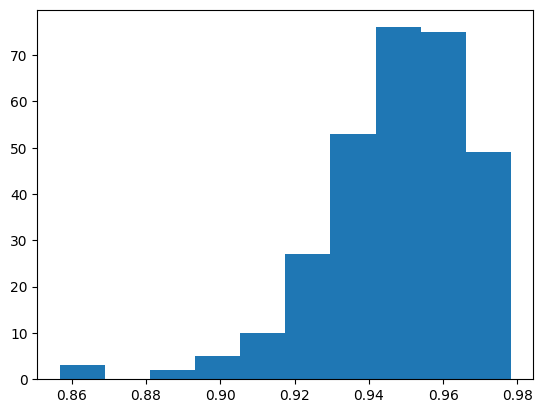

In [272]:
plt.hist(accuracy)
plt.show()

# Visualization difference in uncertainty estimates

In [727]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

Plots of slice no:  4
Case no:  38


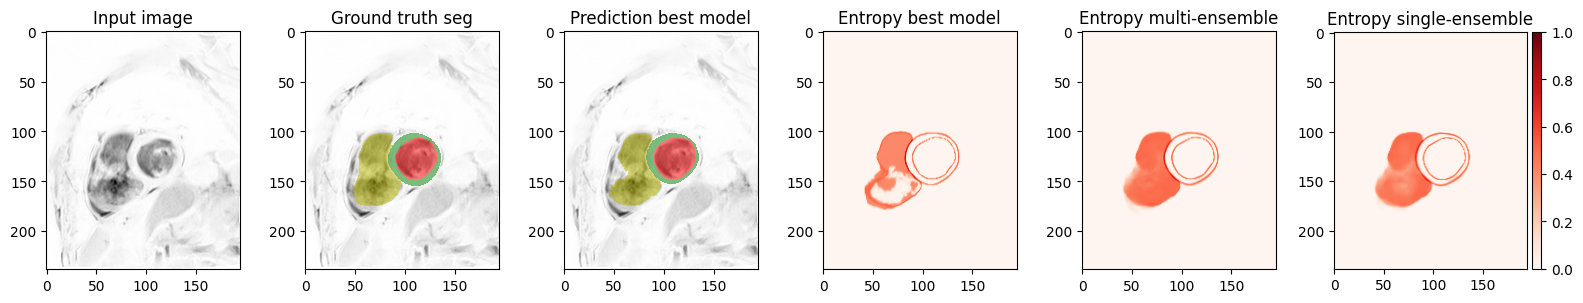

Case no:  60


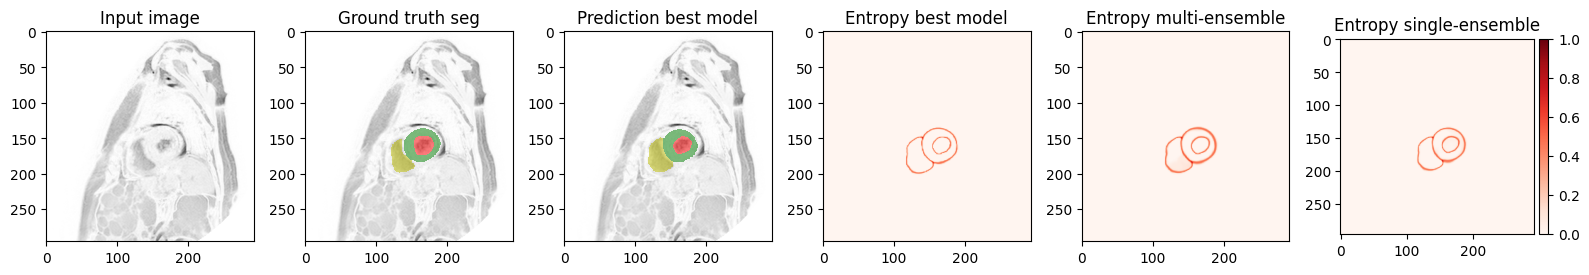

Case no:  39


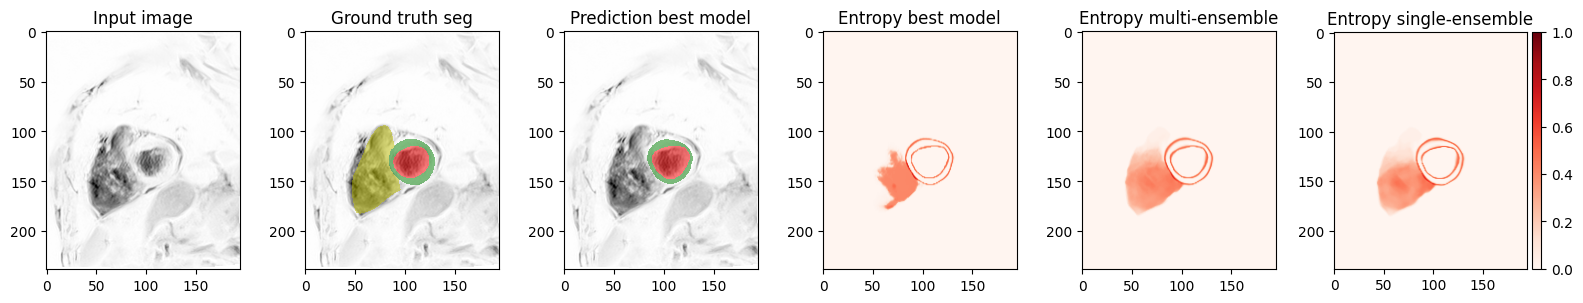

Case no:  242


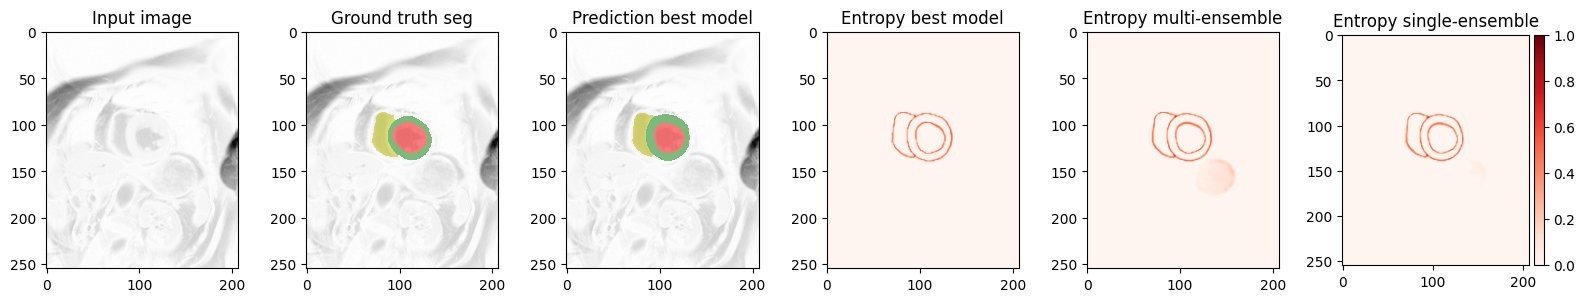

In [765]:
# 38, 60, 39
i = 4
print("Plots of slice no: ", i)
normalizer = np.log2(4)
my_cmap = ListedColormap(['y','g','r'])
my_cmap2 = ListedColormap(['w', 'y','g','r'])

for case_no in [38, 60, 39, 242]:
    print("Case no: ", case_no)
    
    probability_vector = get_best_model_softmax(case_no)
    #print("Prob_vec ", probability_vector.shape)
    
    multi_posterior_vector = get_posterior_vector(case_no)
    #print("Multi post vec ", multi_posterior_vector.shape)
    
    single_posterior_vector = get_posterior_vector(case_no, multi_modal=False)
    #print("Single post vec ", single_posterior_vector.shape)
    input_image = get_input_image(case_no)
    #print("input img ", input_image.shape)
    gt_segmentation = get_gt(case_no)
    
    pred_segmentation_best_model = get_best_model(case_no)
    
    #print("pred_segmentation_best_model", pred_segmentation_best_model.shape)
    
    #ensemble_confidence = np.max(posterior_vector, axis = 0)
    entropy_best_model = entropy(probability_vector, base = 2, axis = 0) / normalizer
    #print("Entropy best", entropy_best_model.shape)
    entropy_multi_modal = entropy(multi_posterior_vector, base = 2, axis = 0) / normalizer
    #print("Entropy multi", entropy_multi_modal.shape)
    entropy_single_modal = entropy(single_posterior_vector, base = 2, axis = 0) / normalizer
 
    alpha = 0.3
    fig, ax = plt.subplots(1,6, figsize = (16, 3))
    
    #my_cmap.set_under('w', alpha=0)
    
    ax[0].set_title('Input image')
    ax[0].imshow(input_image[i, :, :], cmap='Greys') 
    
    ax[1].set_title('Ground truth seg')
    ax[1].imshow(input_image[i, :, :], cmap='Greys')
    masked = np.ma.masked_where(gt_segmentation[i, :, :] == 0, gt_segmentation[i, :, :])
    ax[1].imshow(masked, vmin=0, vmax=3, alpha = 0.5, cmap = my_cmap2) 
    
    ax[2].set_title('Prediction best model')
    ax[2].imshow(input_image[i, :, :], cmap='Greys')
    masked = np.ma.masked_where(pred_segmentation_best_model[i, :, :] == 0, pred_segmentation_best_model[i, :, :])
    ax[2].imshow(masked, vmin=0, vmax=3, alpha = 0.5, cmap = my_cmap2) 
    
    
    #rect = patches.Rectangle((35, 87), 89, 86, linewidth=1, edgecolor='r', facecolor='none')
    #ax[0,1].add_patch(rect)

    ax[3].set_title('Entropy best model')
    ax[3].imshow(entropy_best_model[i, :, :], vmin=0, vmax=1, cmap='Reds')
    
    ax[4].set_title('Entropy multi-ensemble')
    #ax[3].imshow(input_image[i, :, :], cmap='Greys')
    #ax[3].imshow(test_gt[i, :, :], cmap = my_cmap, alpha = 0.7)#vmin=0, vmax=3
    #masked = np.ma.masked_where(ensemble_segmentation[i, :, :] == 0, ensemble_segmentation[i, :, :])
    ax[4].imshow(entropy_multi_modal[i, :, :], vmin=0, vmax=1, cmap='Reds' )#vmin=0, vmax=3
    
    ax[5].set_title('Entropy single-ensemble')
    entropy_plot = ax[5].imshow(entropy_single_modal[i, :, :], vmin=0, vmax=1, cmap='Reds')
    
    divider = make_axes_locatable(ax[5])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(entropy_plot, cax=cax2)
    
    plt.tight_layout(h_pad = 1)
    plt.show()

Plots of slice no:  3
Case no:  38


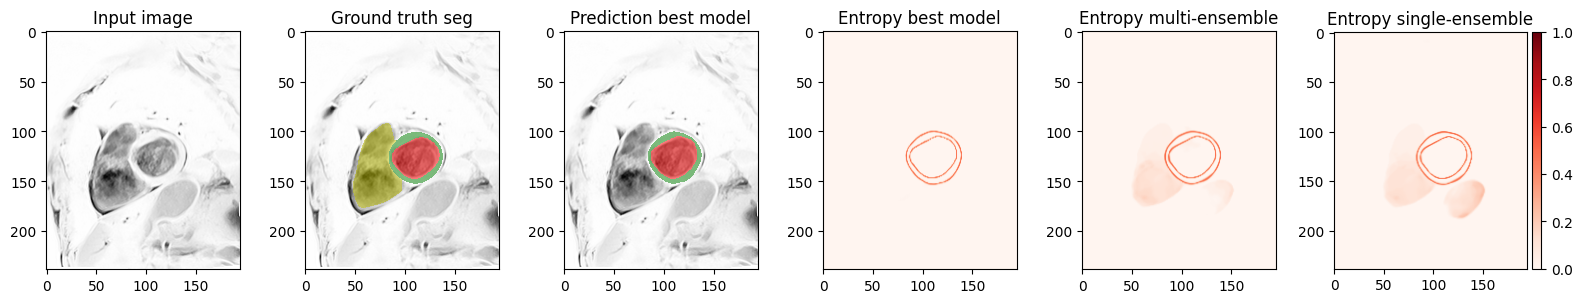

Case no:  60


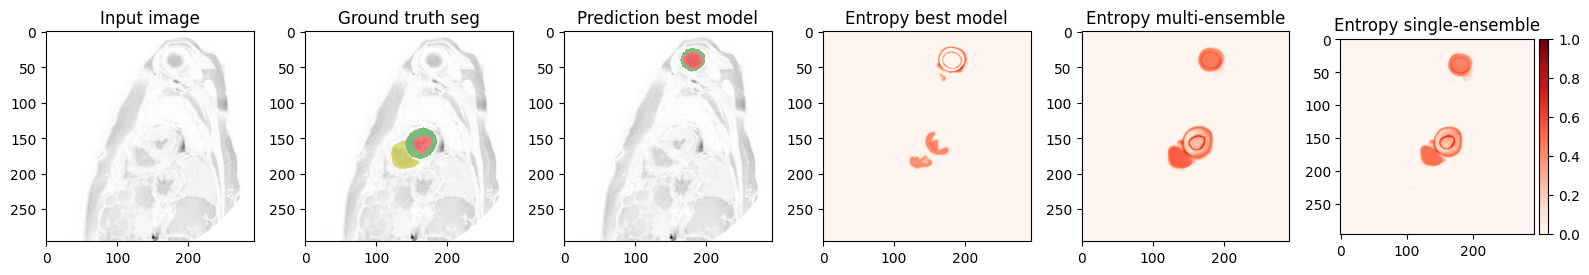

Case no:  39


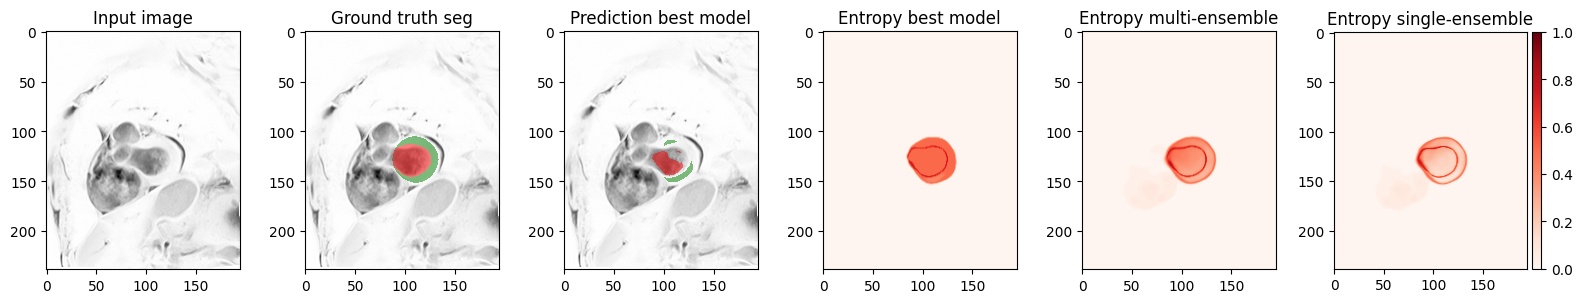

Case no:  242


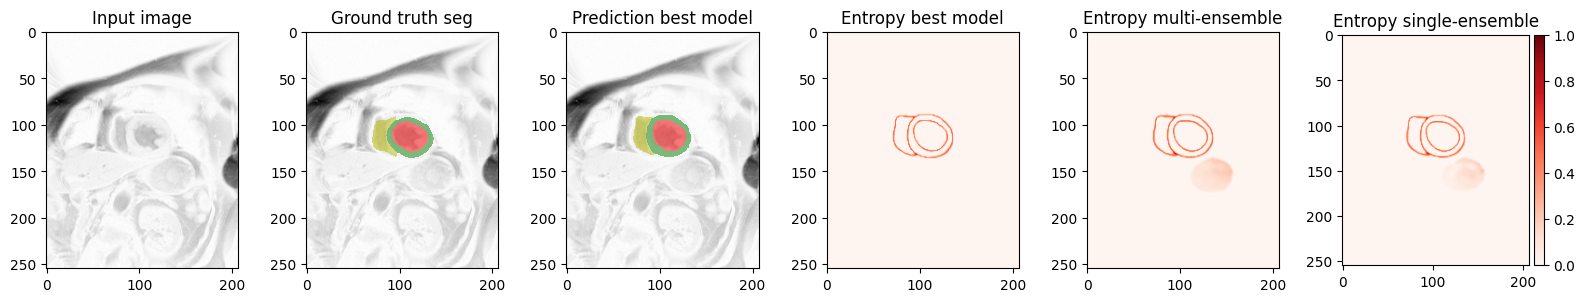

In [773]:
i = 3
print("Plots of slice no: ", i)
normalizer = np.log2(4)
my_cmap = ListedColormap(['y','g','r'])
my_cmap2 = ListedColormap(['w', 'y','g','r'])

for case_no in [38, 60, 39, 242]:
    print("Case no: ", case_no)
    
    probability_vector = get_best_model_softmax(case_no)
    #print("Prob_vec ", probability_vector.shape)
    
    multi_posterior_vector = get_posterior_vector(case_no)
    #print("Multi post vec ", multi_posterior_vector.shape)
    
    single_posterior_vector = get_posterior_vector(case_no, multi_modal=False)
    #print("Single post vec ", single_posterior_vector.shape)
    input_image = get_input_image(case_no)
    #print("input img ", input_image.shape)
    gt_segmentation = get_gt(case_no)
    
    pred_segmentation_best_model = get_best_model(case_no)
    
    #print("pred_segmentation_best_model", pred_segmentation_best_model.shape)
    
    #ensemble_confidence = np.max(posterior_vector, axis = 0)
    entropy_best_model = entropy(probability_vector, base = 2, axis = 0) / normalizer
    #print("Entropy best", entropy_best_model.shape)
    entropy_multi_modal = entropy(multi_posterior_vector, base = 2, axis = 0) / normalizer
    #print("Entropy multi", entropy_multi_modal.shape)
    entropy_single_modal = entropy(single_posterior_vector, base = 2, axis = 0) / normalizer
 
    alpha = 0.3
    fig, ax = plt.subplots(1,6, figsize = (16, 3))
    
    #my_cmap.set_under('w', alpha=0)
    
    ax[0].set_title('Input image')
    ax[0].imshow(input_image[i, :, :], cmap='Greys') 
    
    ax[1].set_title('Ground truth seg')
    ax[1].imshow(input_image[i, :, :], cmap='Greys')
    masked = np.ma.masked_where(gt_segmentation[i, :, :] == 0, gt_segmentation[i, :, :])
    ax[1].imshow(masked, vmin=0, vmax=3, alpha = 0.5, cmap = my_cmap2) 
    
    ax[2].set_title('Prediction best model')
    ax[2].imshow(input_image[i, :, :], cmap='Greys')
    masked = np.ma.masked_where(pred_segmentation_best_model[i, :, :] == 0, pred_segmentation_best_model[i, :, :])
    ax[2].imshow(masked, vmin=0, vmax=3, alpha = 0.5, cmap = my_cmap2) 
    
    
    #rect = patches.Rectangle((35, 87), 89, 86, linewidth=1, edgecolor='r', facecolor='none')
    #ax[0,1].add_patch(rect)

    ax[3].set_title('Entropy best model')
    ax[3].imshow(entropy_best_model[i, :, :], vmin=0, vmax=1, cmap='Reds')
    
    ax[4].set_title('Entropy multi-ensemble')
    #ax[3].imshow(input_image[i, :, :], cmap='Greys')
    #ax[3].imshow(test_gt[i, :, :], cmap = my_cmap, alpha = 0.7)#vmin=0, vmax=3
    #masked = np.ma.masked_where(ensemble_segmentation[i, :, :] == 0, ensemble_segmentation[i, :, :])
    ax[4].imshow(entropy_multi_modal[i, :, :], vmin=0, vmax=1, cmap='Reds' )#vmin=0, vmax=3
    
    ax[5].set_title('Entropy single-ensemble')
    entropy_plot = ax[5].imshow(entropy_single_modal[i, :, :], vmin=0, vmax=1, cmap='Reds')
    
    divider = make_axes_locatable(ax[5])
    cax2 = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(entropy_plot, cax=cax2)
    
    plt.tight_layout(h_pad = 1)
    plt.show()


In [ ]:
# general problem: in 2D, information is not shared between the slices
# ensemble entropy can capture larger regions where errors are made, e.g. case 38 slice 6 or case 242 slice 5
# but in case 60 slice 0, case 38, 1, there is large entropy, despite no error is made in this region -> best model would be better
# the ensembe entropy sometimes captures more shapes e.g. 242, 5 or 60, 2
# in case 60, 3 the ensemlbe is a good indicator of uncertainty
